In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [590]:
## Hybrid models
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.deterministic import DeterministicProcess

# read data 

In [2]:
data_raw = pd.read_csv("Verbr_2008_2021_sanitarisiert.txt", sep='\t')

In [3]:
data_raw = data_raw.set_index("MatNr_n")

In [30]:
data_raw[100:]

,M200801,M200802,M200803,M200804,M200805,M200806,M200807,M200808,M200809,M200810,...,M202103,M202104,M202105,M202106,M202107,M202108,M202109,M202110,M202111,M202112
MatNr_n,,,,,,,,,,,,,,,,,,,,,
55168752200,0,0,0,0,0,0,0,0,0,0,...,1,1,4,3,3,0,0,1,0,0
55785227225,0,0,0,1,1,2,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
56334465415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56557777948,0,0,0,8,0,1,4,1,10,24,...,135,73,87,64,108,86,63,47,122,34
57406506203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653154999930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7653761044143,0,0,0,0,0,0,1,0,5,0,...,4,0,0,0,4,2,4,4,0,4
7654080459855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
data_raw.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
data_raw.index[100]

55168752200

In [43]:
pd.to_datetime(data_raw.index, unit='us')

DatetimeIndex(['1970-01-02 04:42:59.653791', '1970-01-02 04:54:40.986274',
               '1970-01-02 05:10:25.501059', '1970-01-02 05:28:50.007753',
               '1970-01-02 05:42:19.853290', '1970-01-02 20:43:12.885671',
               '1970-01-02 20:45:07.452321', '1970-01-02 20:52:19.455622',
               '1970-01-02 21:19:41.801118', '1970-01-02 21:34:48.406416',
               ...
               '1970-03-30 13:03:09.836410', '1970-03-30 13:18:59.105597',
               '1970-03-30 13:20:57.034321', '1970-03-30 13:30:57.006310',
               '1970-03-30 13:31:36.466448', '1970-03-30 13:52:34.999930',
               '1970-03-30 14:02:41.044143', '1970-03-30 14:08:00.459855',
               '1970-03-30 14:24:15.223997', '1970-03-30 14:44:38.055228'],
              dtype='datetime64[ns]', name='MatNr_n', length=150810, freq=None)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150810 entries, 103379653791 to 7656278055228
Columns: 168 entries, M200801 to M202112
dtypes: int64(168)
memory usage: 194.4 MB


In [47]:
data_raw[data_raw['M200803'] > 10000]

,M200801,M200802,M200803,M200804,M200805,M200806,M200807,M200808,M200809,M200810,...,M202103,M202104,M202105,M202106,M202107,M202108,M202109,M202110,M202111,M202112
MatNr_n,,,,,,,,,,,,,,,,,,,,,
1813773580904,0,40000,130000,0,30000,20000,0,30000,0,0,...,0,0,0,0,0,0,0,0,0,0
6764026631562,1125,2400,23305,0,700,850,5640,24986,2050,750,...,5719,31857,1466,3068,12806,3284,3556,5696,829,2260


In [49]:
data_raw.describe().T.index

Index(['M200801', 'M200802', 'M200803', 'M200804', 'M200805', 'M200806',
       'M200807', 'M200808', 'M200809', 'M200810',
       ...
       'M202103', 'M202104', 'M202105', 'M202106', 'M202107', 'M202108',
       'M202109', 'M202110', 'M202111', 'M202112'],
      dtype='object', length=168)

In [59]:
df = data_raw.copy()

## EDA Data

In [50]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150810 entries, 103379653791 to 7656278055228
Columns: 168 entries, M200801 to M202112
dtypes: int64(168)
memory usage: 194.4 MB


In [85]:
data_raw

,M200801,M200802,M200803,M200804,M200805,M200806,M200807,M200808,M200809,M200810,...,M202103,M202104,M202105,M202106,M202107,M202108,M202109,M202110,M202111,M202112
MatNr_n,,,,,,,,,,,,,,,,,,,,,
103379653791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104080986274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105025501059,0,0,0,0,0,7,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
106130007753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106939853290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653154999930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7653761044143,0,0,0,0,0,0,1,0,5,0,...,4,0,0,0,4,2,4,4,0,4
7654080459855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


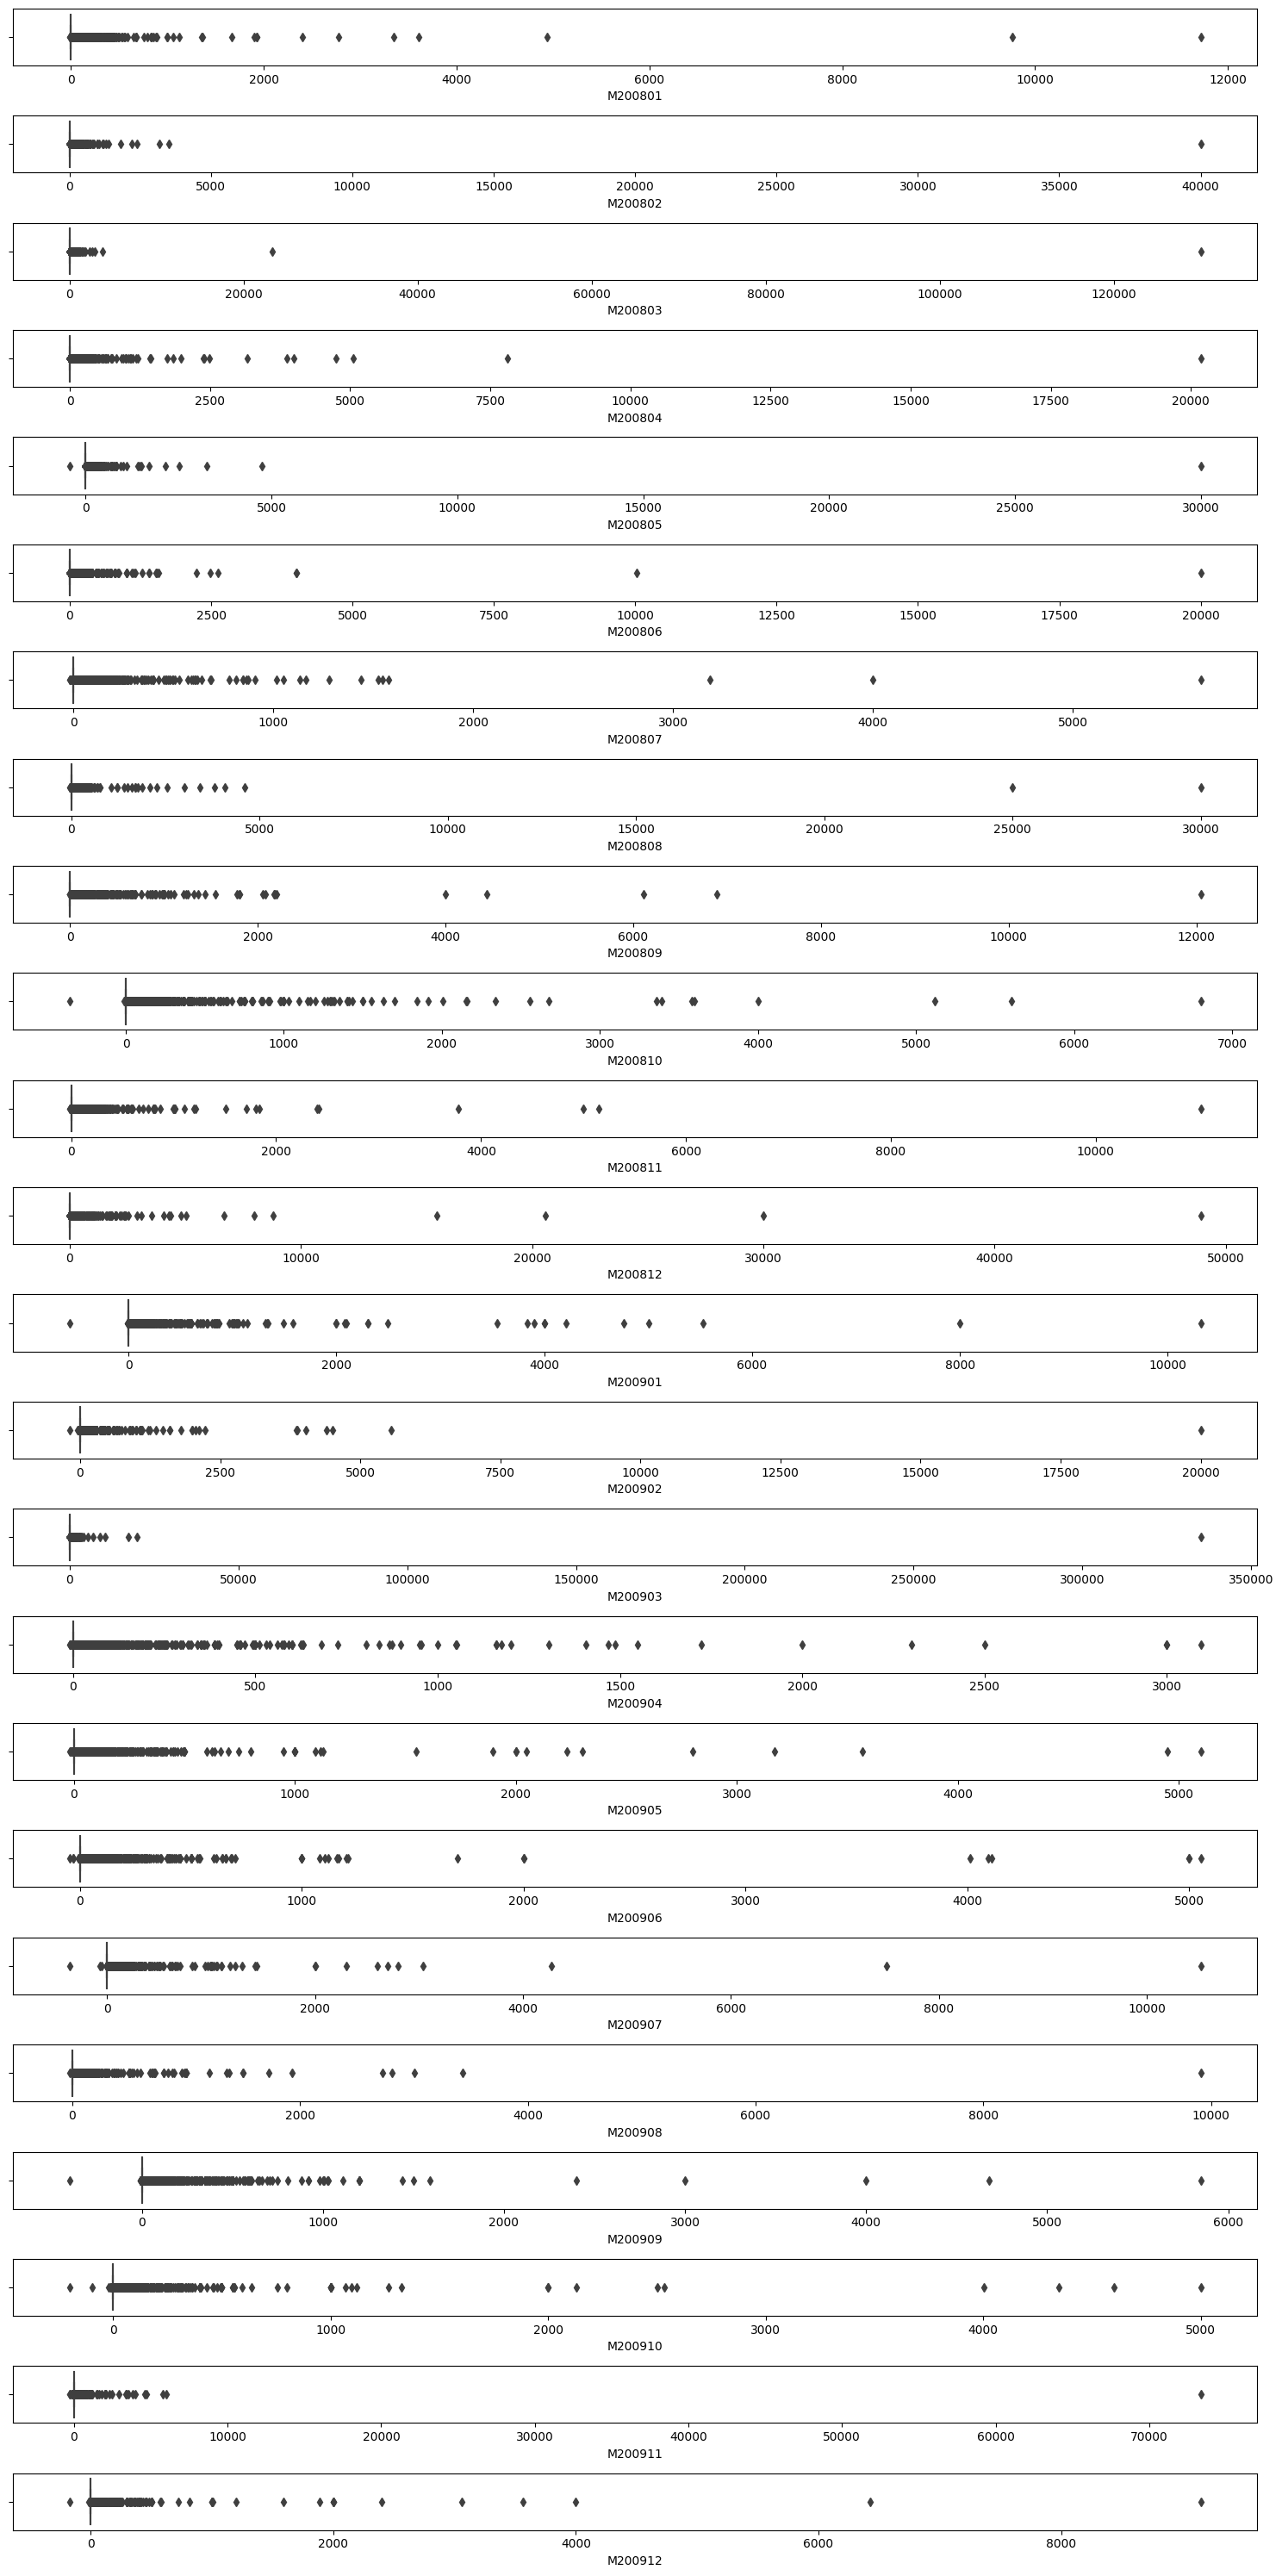

In [104]:
plt.figure(figsize=(15,30))
for i, col in enumerate(data_raw.columns[:24]):
    ax= plt.subplot(24, 1, i+1)
    ax.set_xlabel(col)
    sns.boxplot(data=data_raw, x=col,ax=ax)
plt.tight_layout()
plt.show()

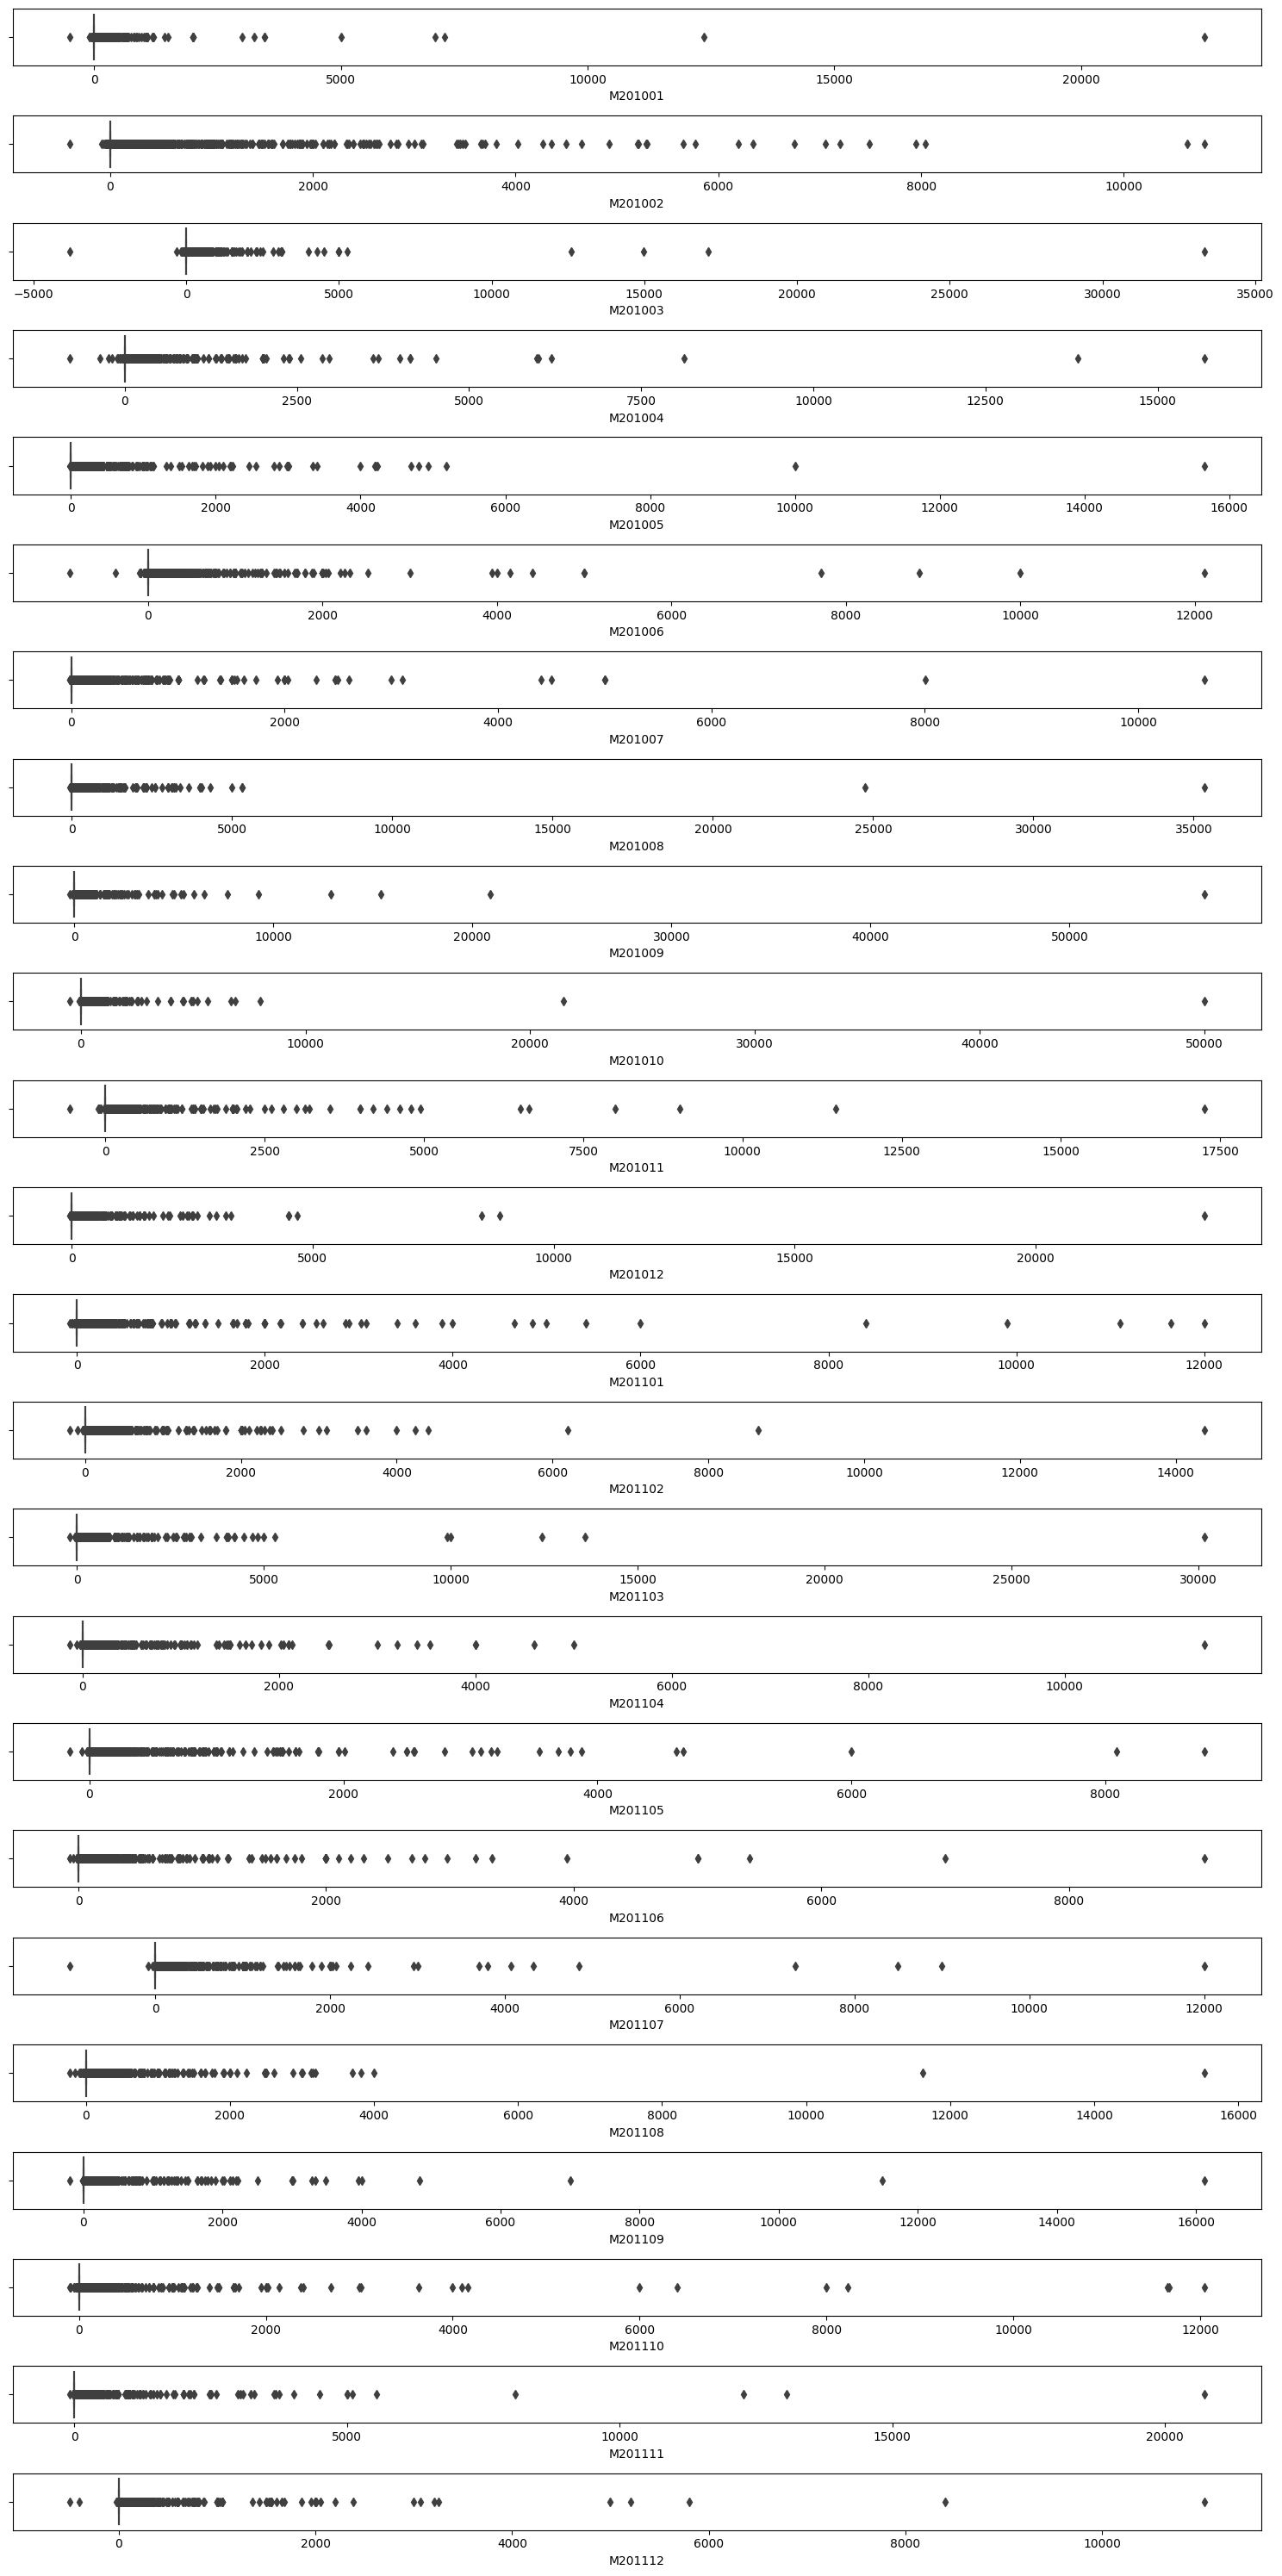

In [105]:
plt.figure(figsize=(15,30))
for i, col in enumerate(data_raw.columns[24:48]):
    ax= plt.subplot(24, 1, i+1)
    ax.set_xlabel(col)
    sns.boxplot(data=data_raw, x=col,ax=ax)
plt.tight_layout()
plt.show()

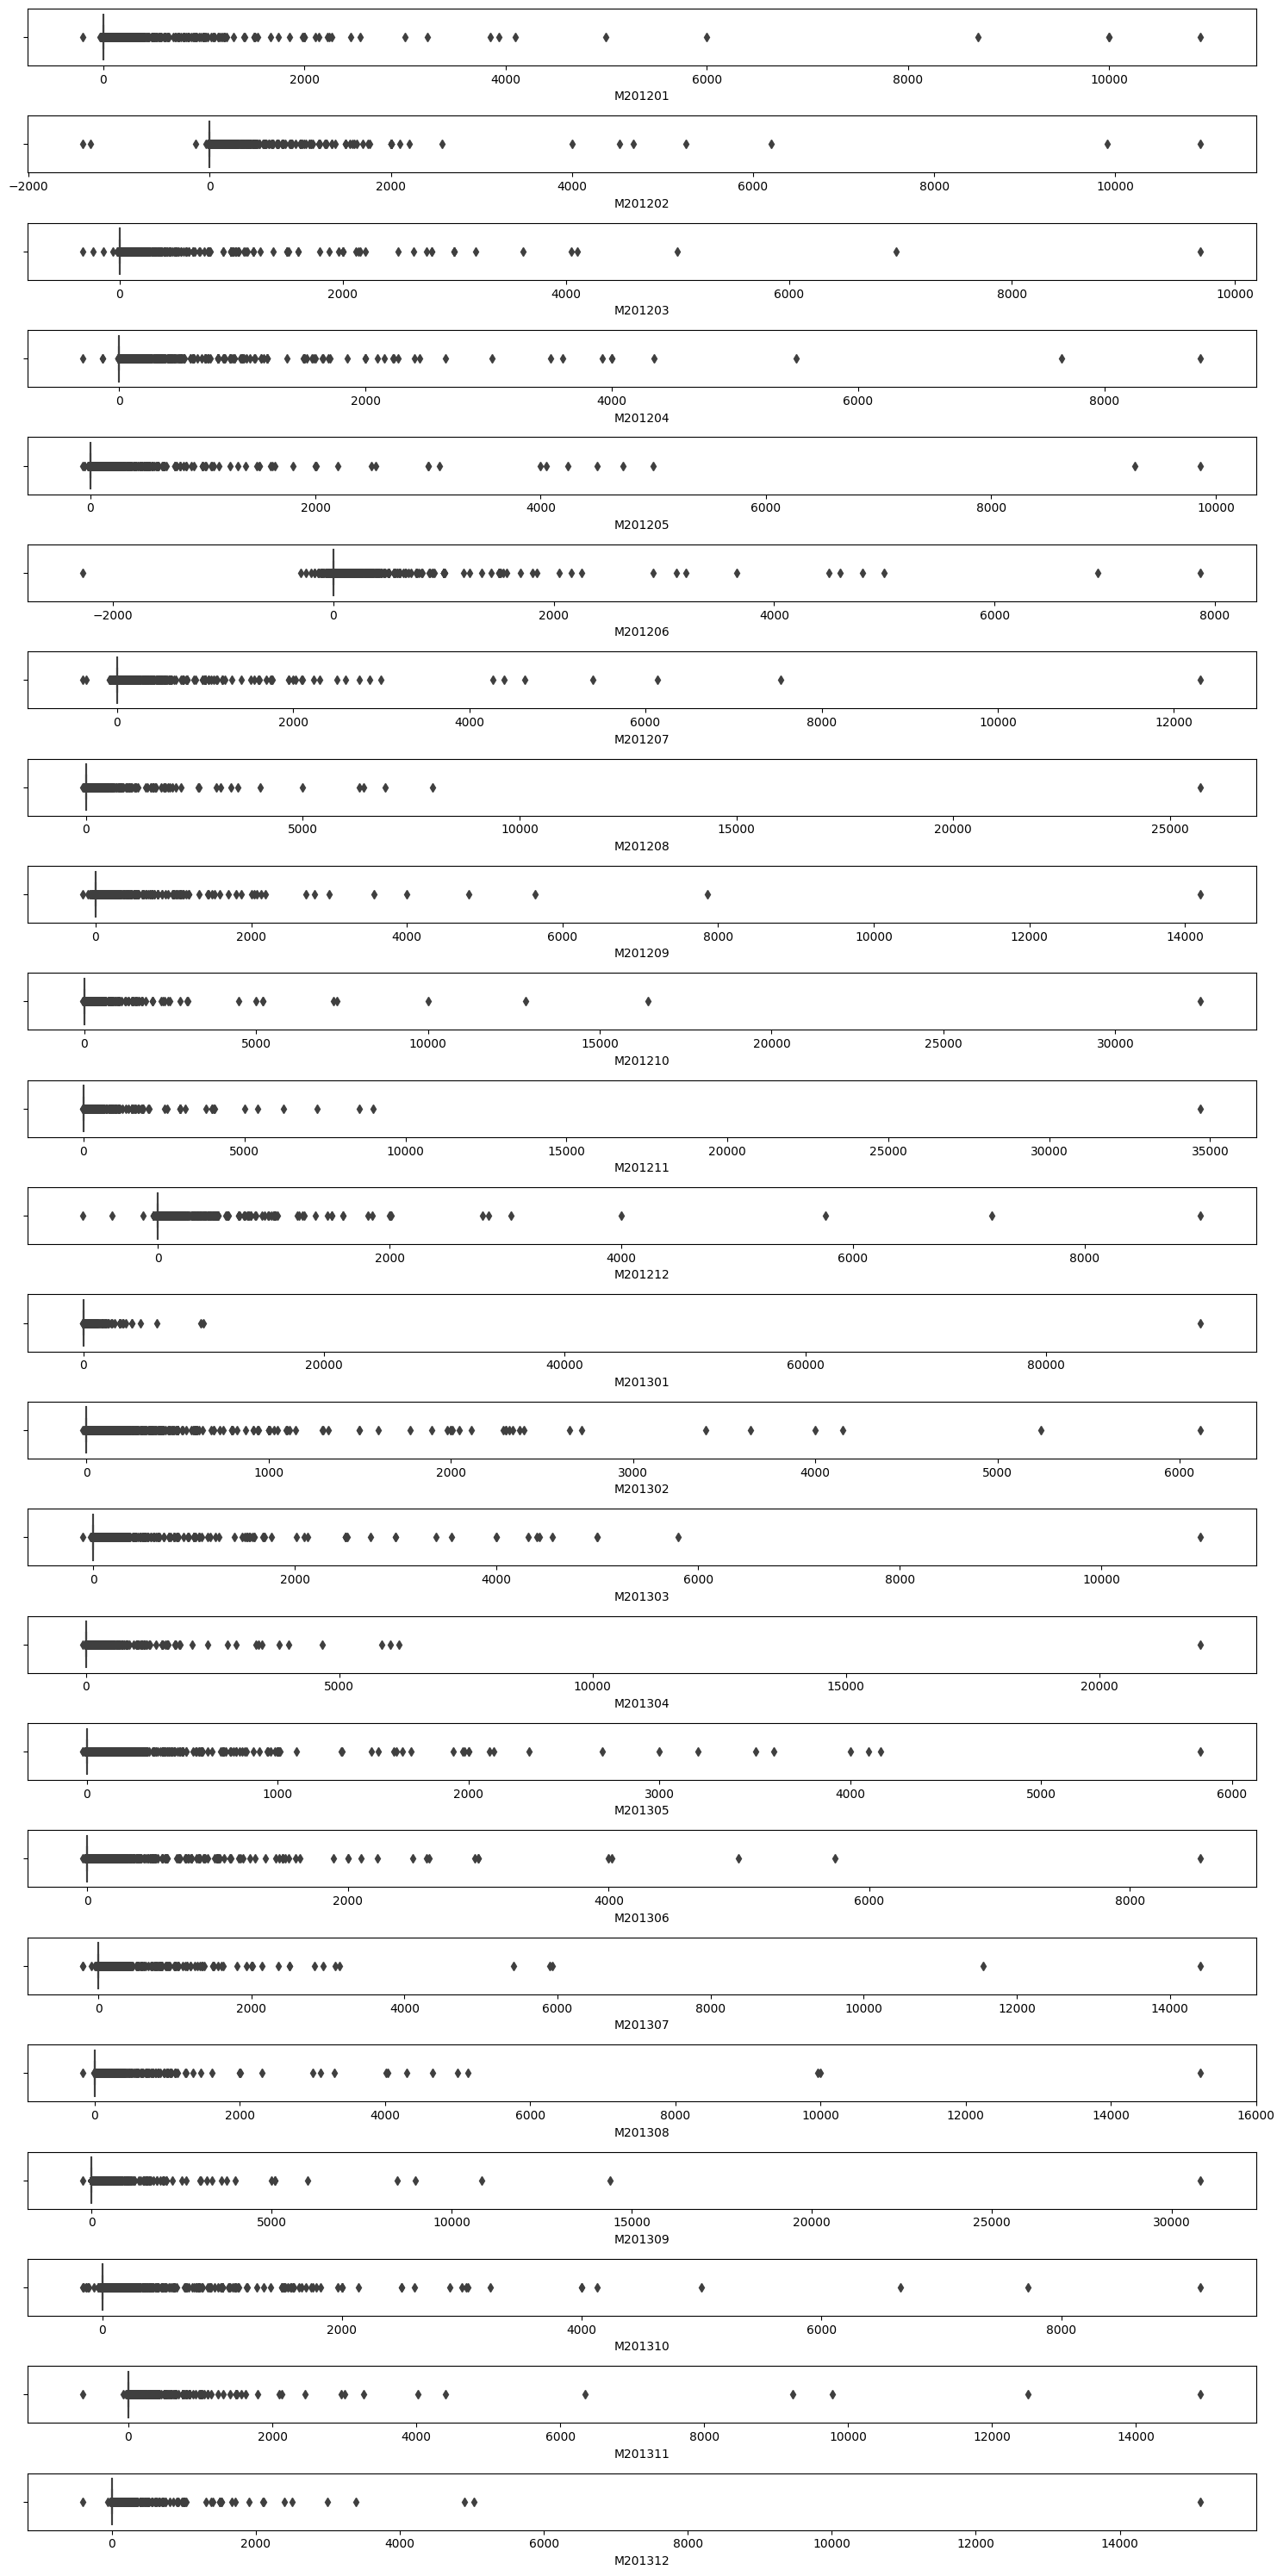

In [108]:
plt.figure(figsize=(15,30))
for i, col in enumerate(data_raw.columns[48:72]):
    ax= plt.subplot(24, 1, i+1)
    ax.set_xlabel(col)
    sns.boxplot(data=data_raw, x=col,ax=ax)
plt.tight_layout()
plt.show()

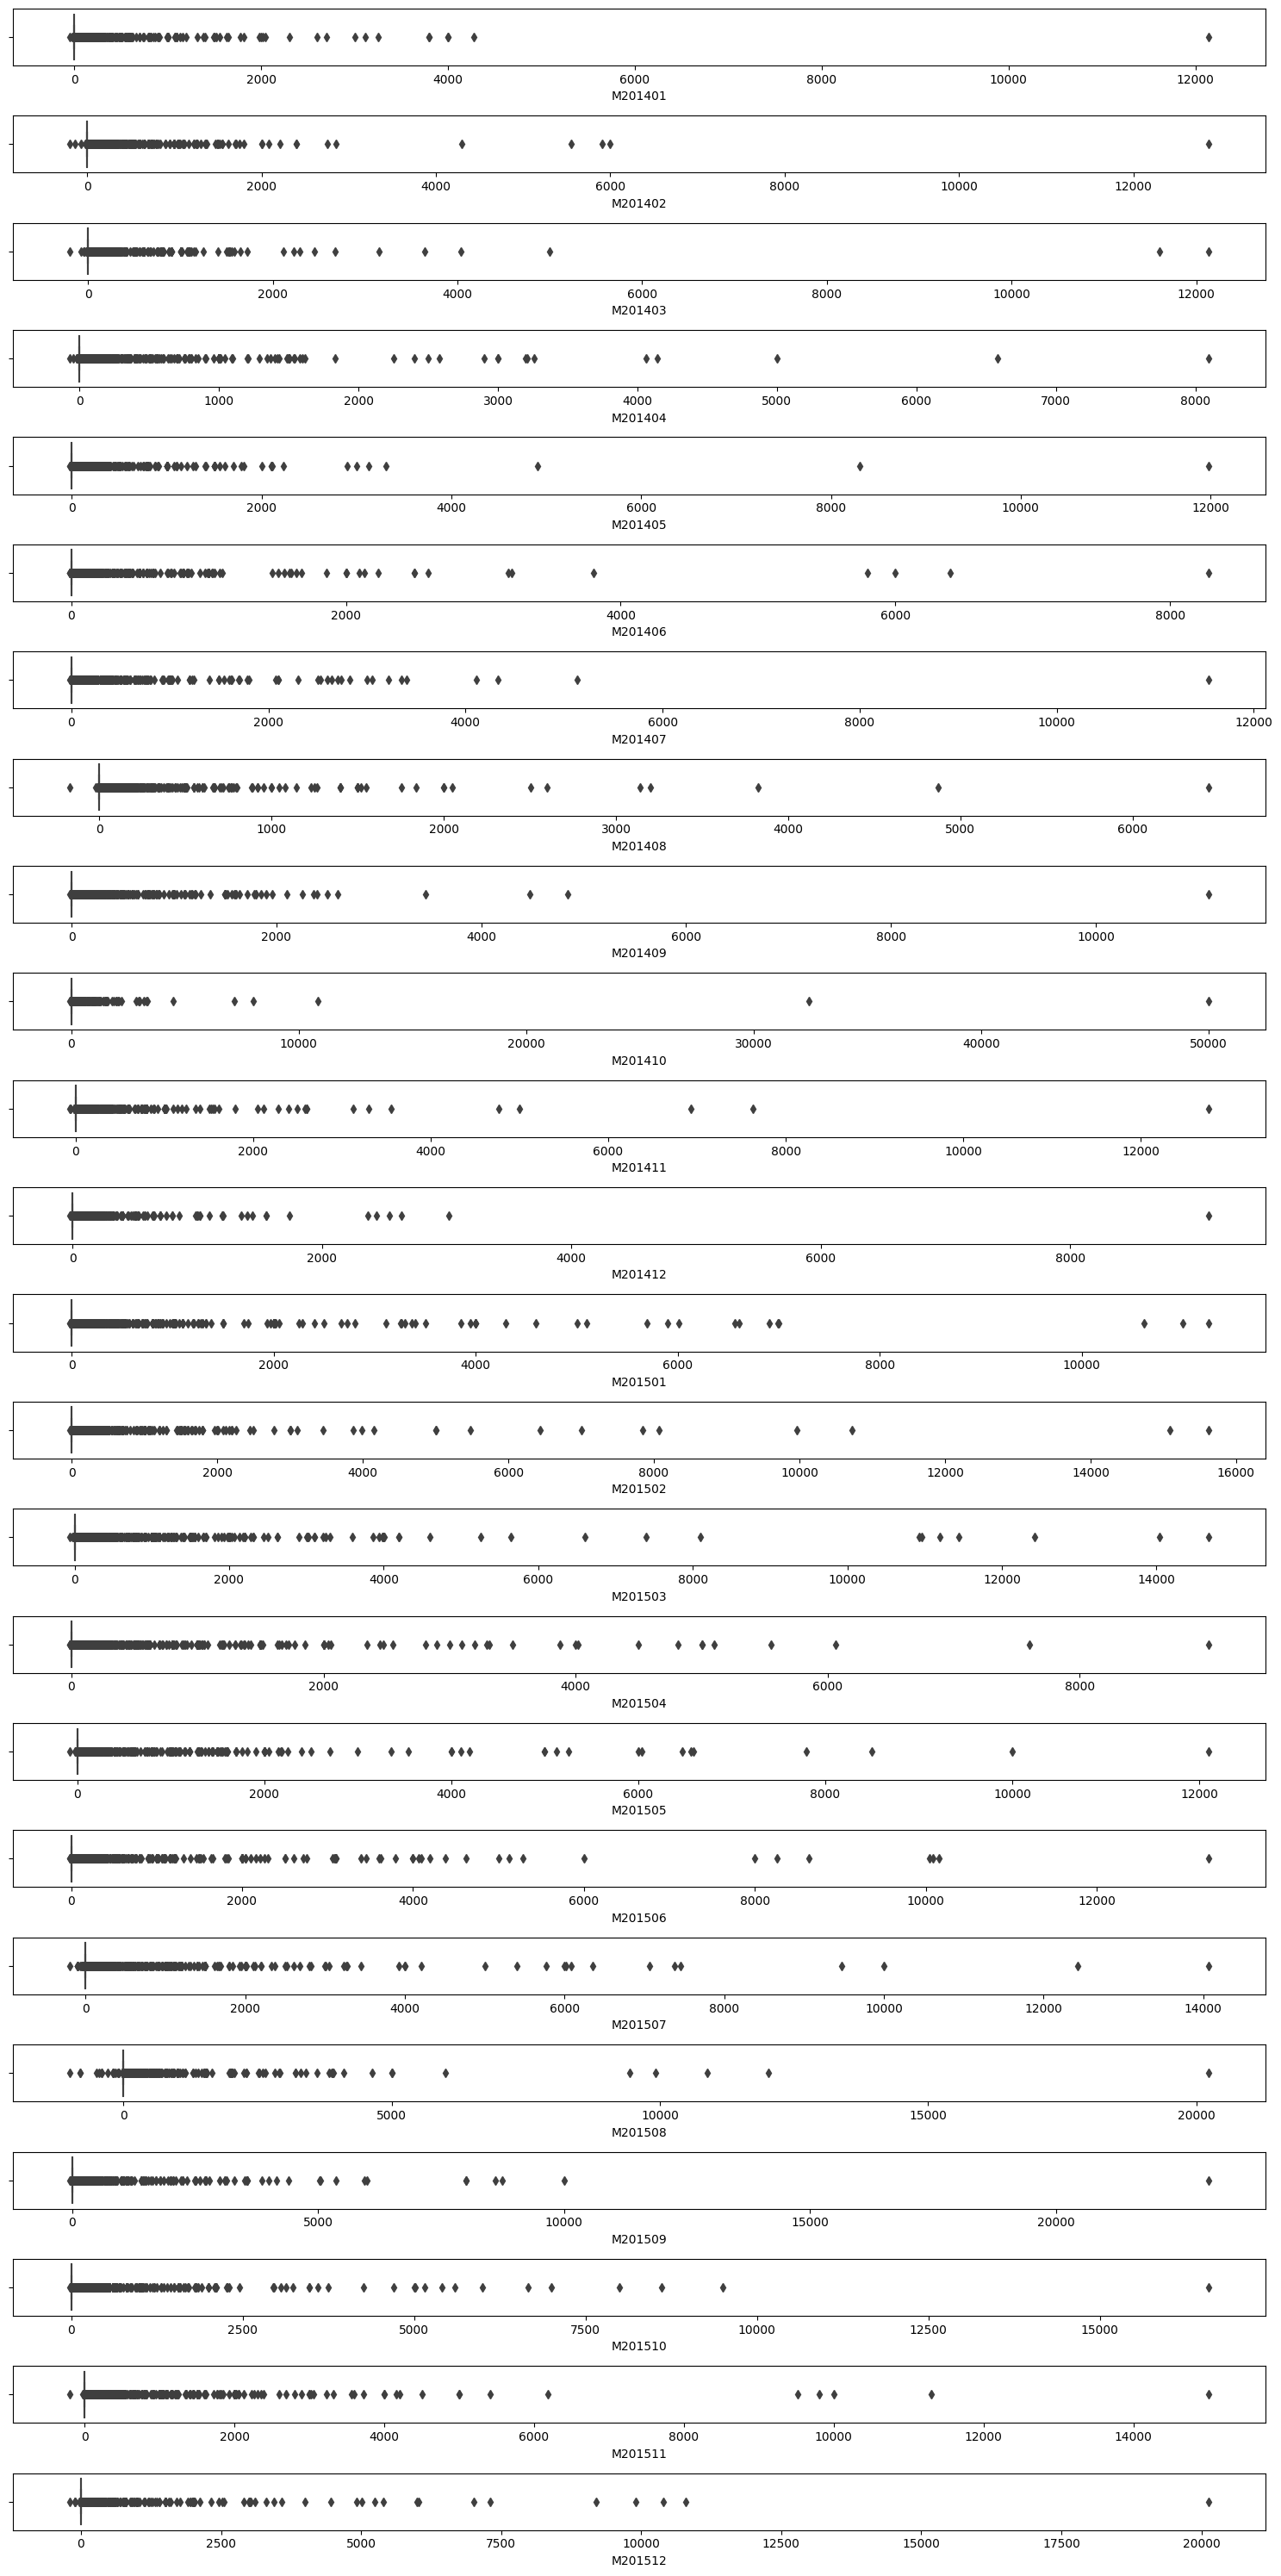

In [111]:
plt.figure(figsize=(15,30))
for i, col in enumerate(data_raw.columns[72:96]):
    ax= plt.subplot(24, 1, i+1)
    ax.set_xlabel(col)
    sns.boxplot(data=data_raw, x=col,ax=ax)
plt.tight_layout()
plt.show();

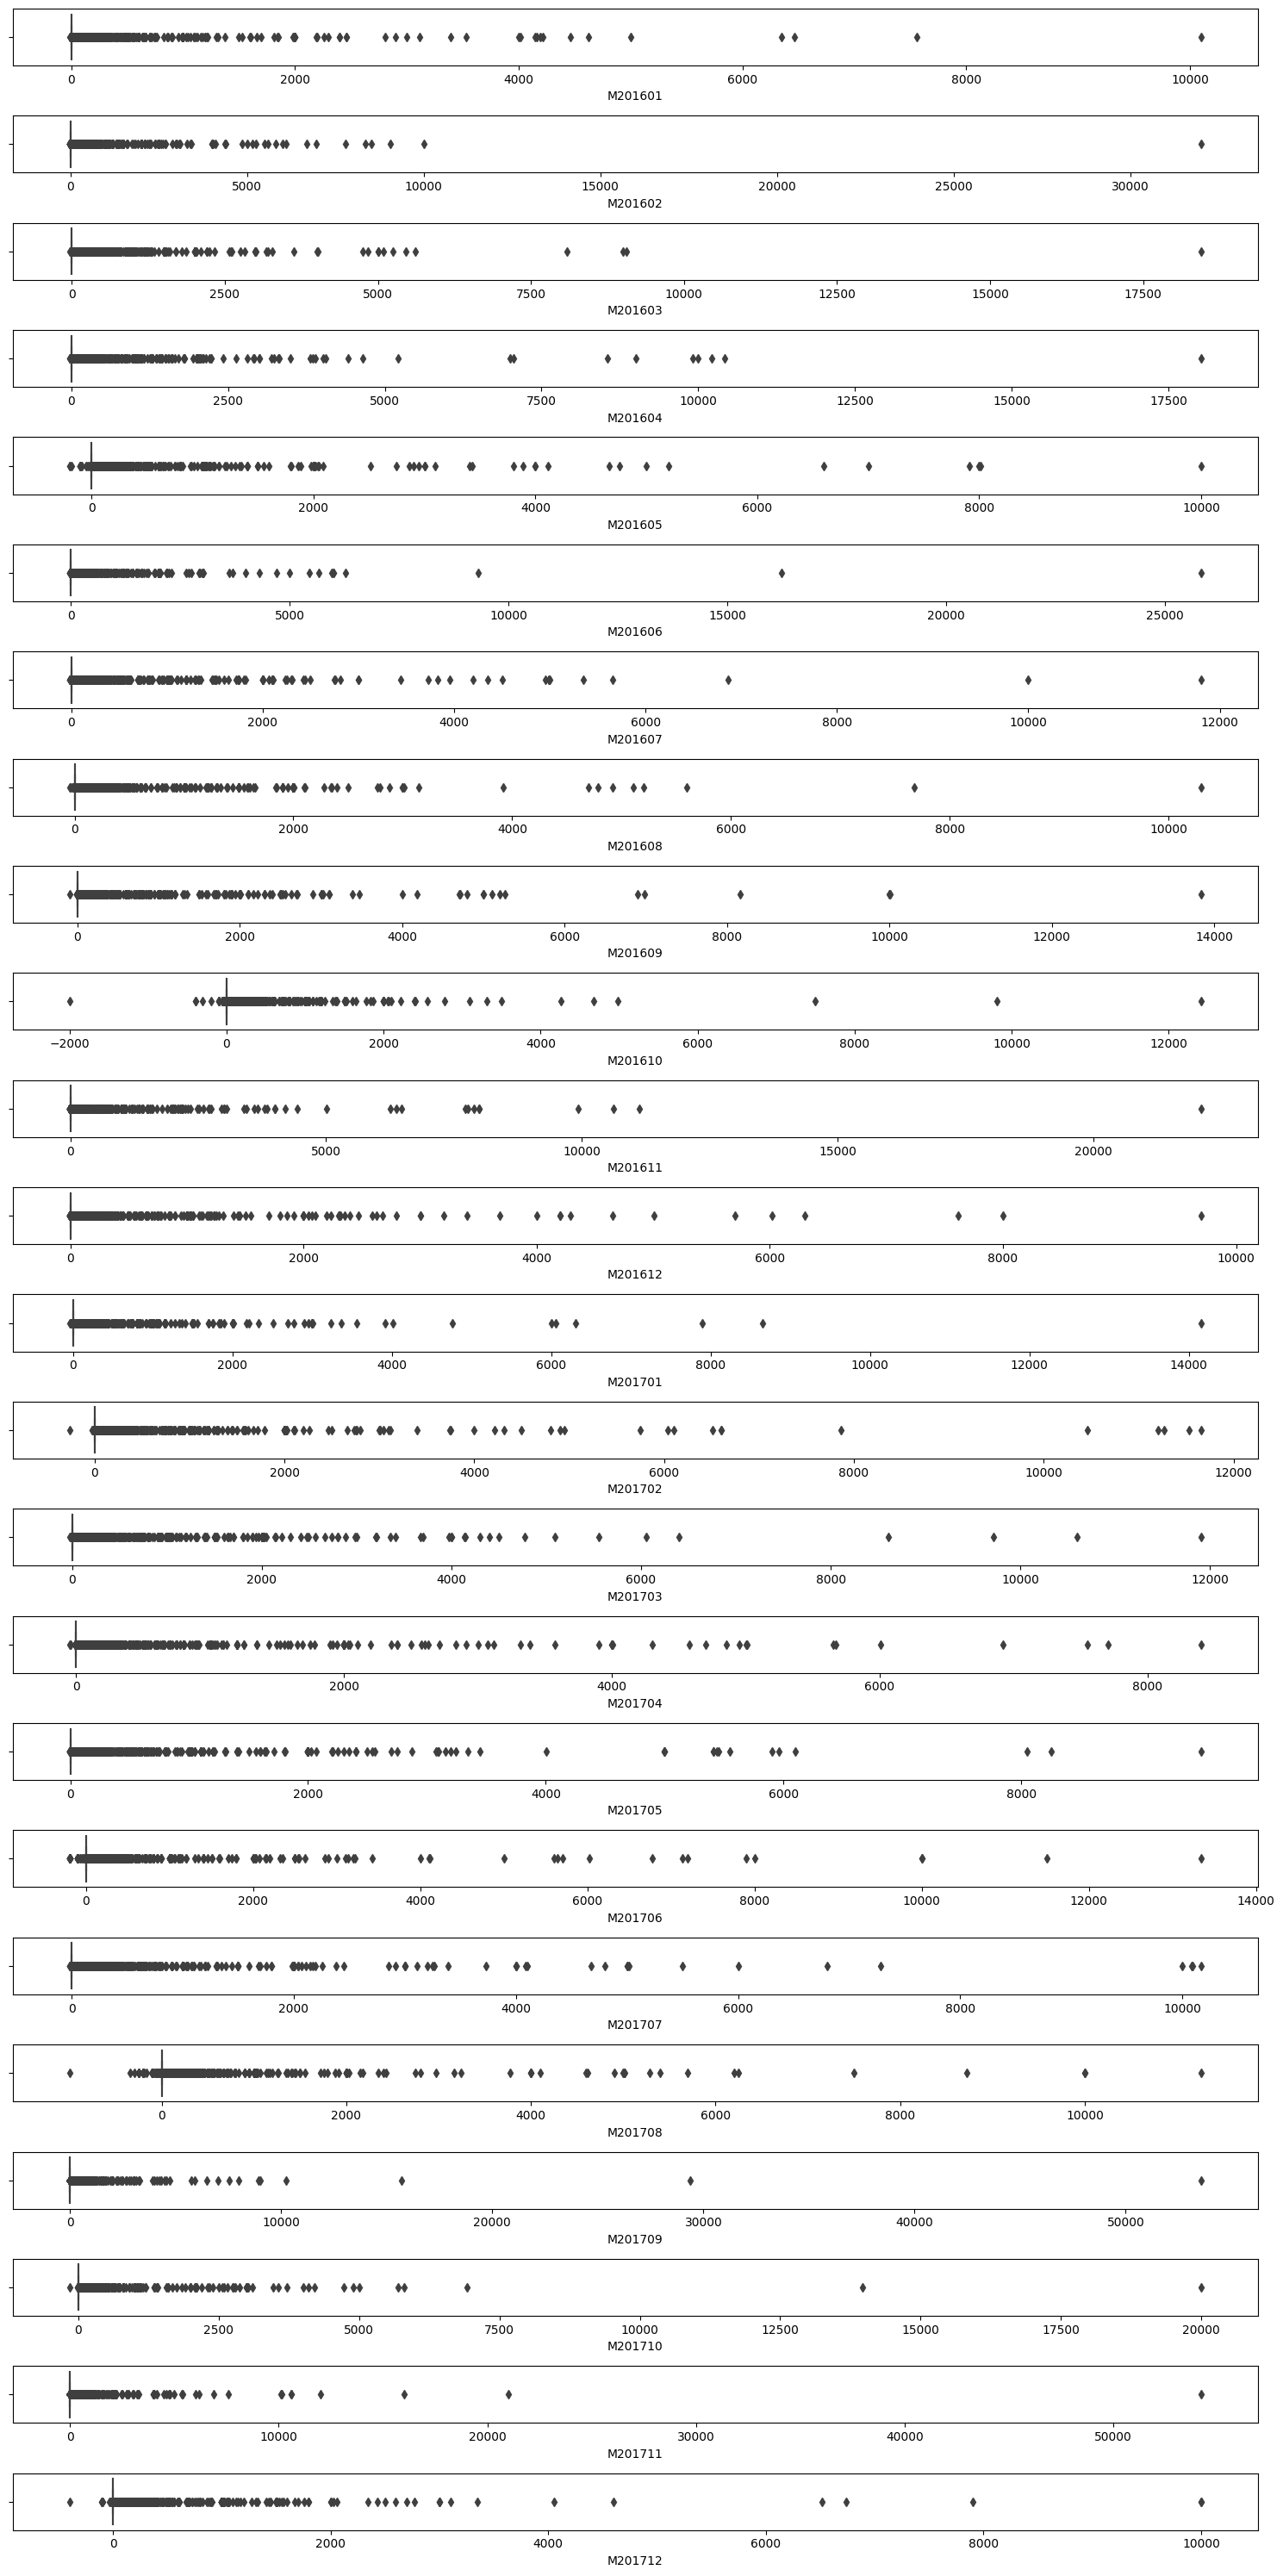

In [113]:
plt.figure(figsize=(15,30))
for i, col in enumerate(data_raw.columns[96:120]):
    ax= plt.subplot(24, 1, i+1)
    ax.set_xlabel(col)
    sns.boxplot(data=data_raw, x=col,ax=ax)
plt.tight_layout()
plt.show();

In [453]:
def plot_month(df, title=''):
    df = df[df.columns[df.columns.str.contains('M20')]]
    sum_month = df.sum(axis=0)
    month = np.array([datetime.strptime(date,'M%Y%m').date() for date in sum_month.index])
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.plot(month, sum_month.values);

In [488]:
def plot_month_mean(df, title=''):
    df = df[df.columns[df.columns.str.contains('M20')]]
    sum_month = df.mean(axis=0)
    month = np.array([datetime.strptime(date,'M%Y%m').date() for date in sum_month.index])
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.plot(month, sum_month.values);

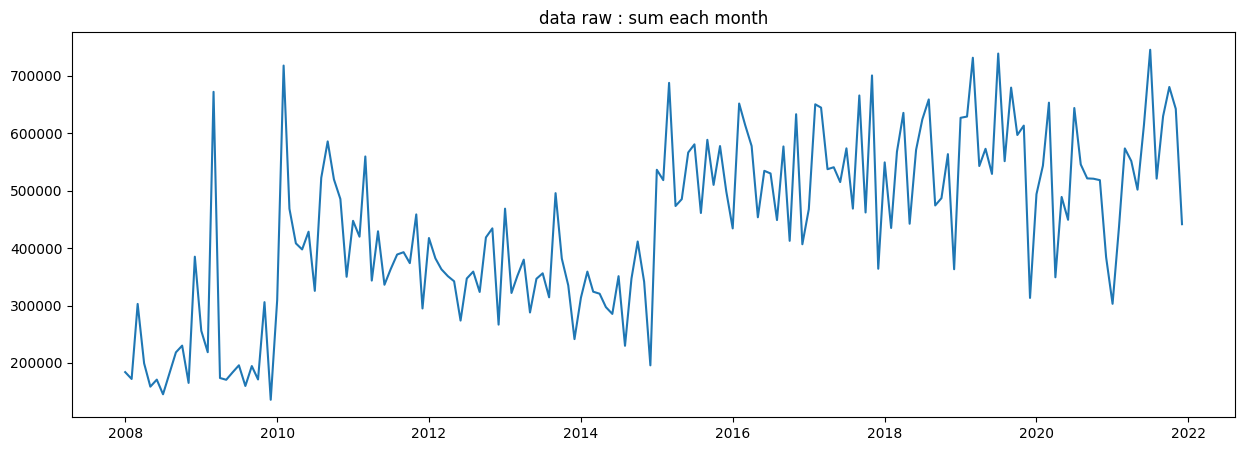

In [490]:
plot_month(data_raw,'data raw : sum each month')

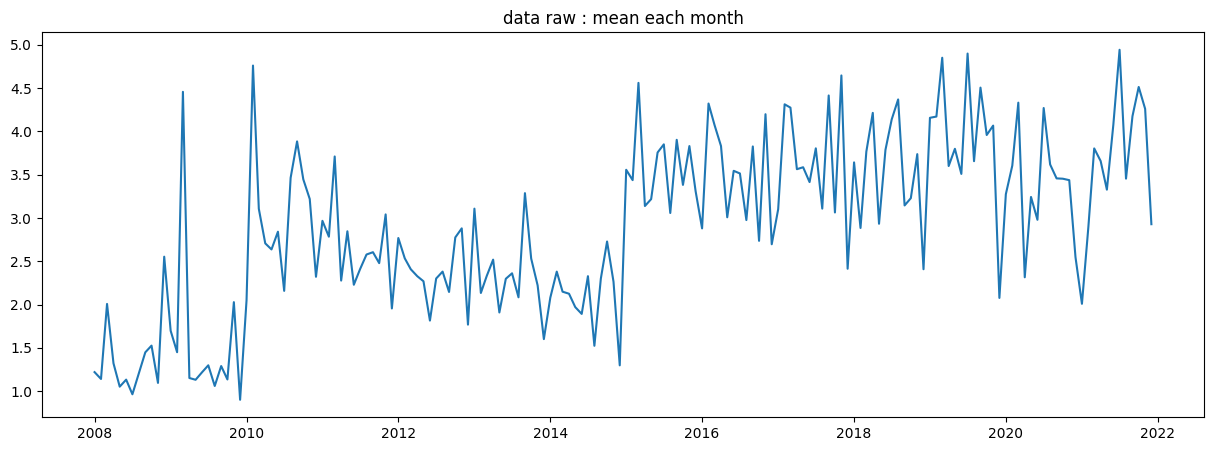

In [491]:
plot_month_mean(data_raw,'data raw : mean each month')

In [417]:
df.index.sort_values()[:10]

Int64Index([139437620, 218348584, 226995914, 234348706, 412715610, 424887997,
            430685480, 472376136, 510453260, 715246444],
           dtype='int64', name='MatNr_n')

In [424]:
df_sort = df.sort_index().copy()

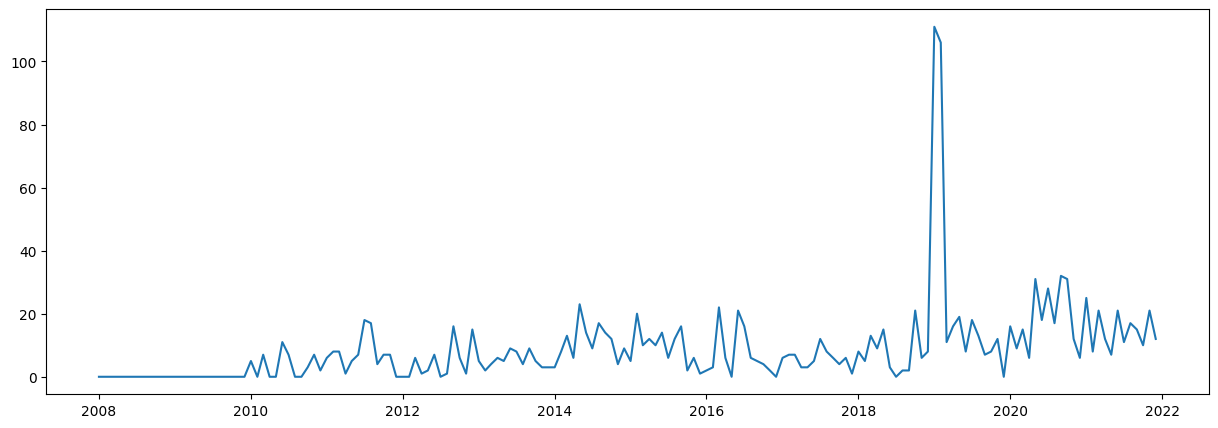

In [425]:
plot_month(df_sort[:10])

In [430]:
len(str(df_sort.index))

445

In [431]:
df_sort['len_idx'] = df_sort.index

In [438]:
df_sort['len_idx']  = df_sort.apply(lambda row: len(str(row['len_idx'])), axis=1)

In [442]:
df_sort['len_idx'].value_counts()

13    135755
12     13529
11      1360
10       153
9         13
Name: len_idx, dtype: int64

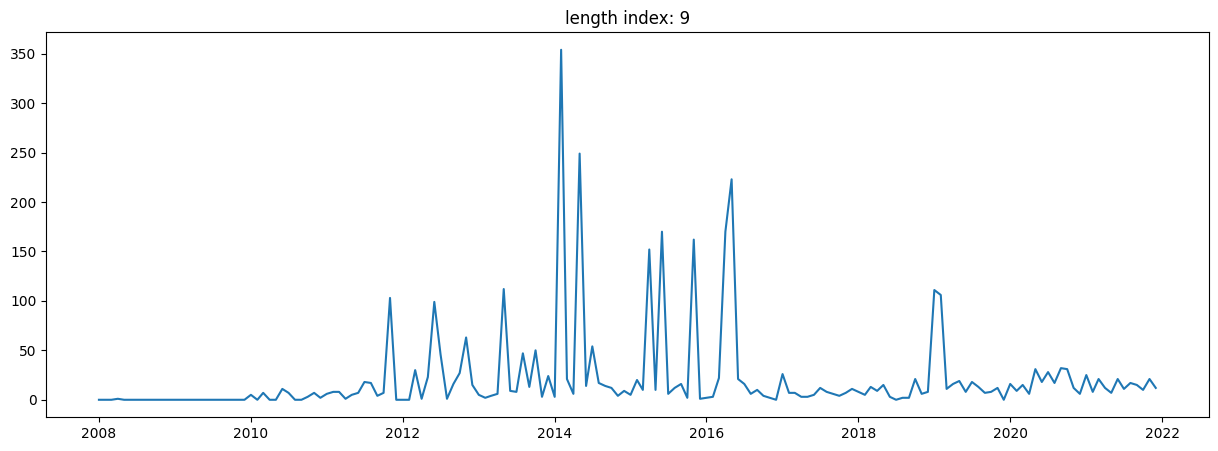

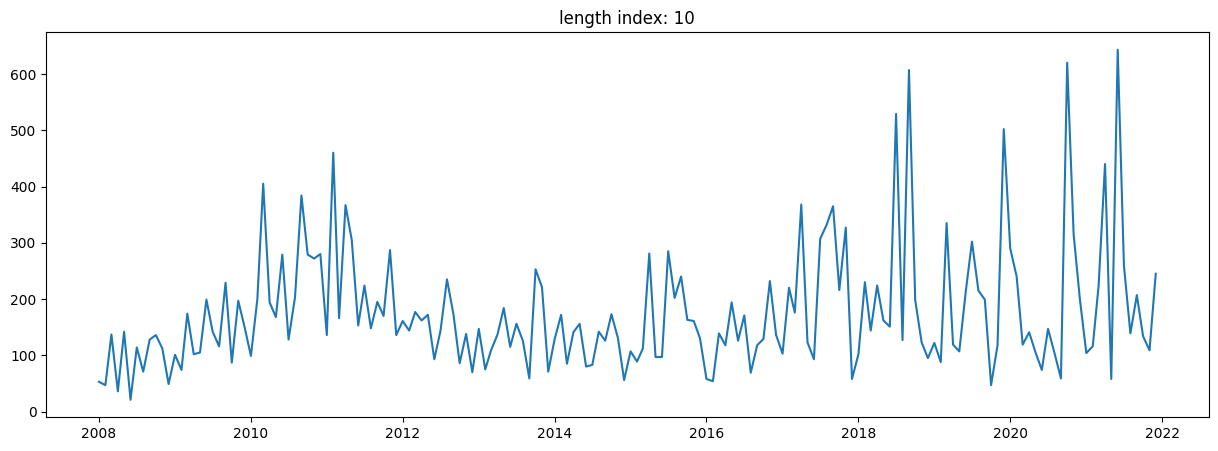

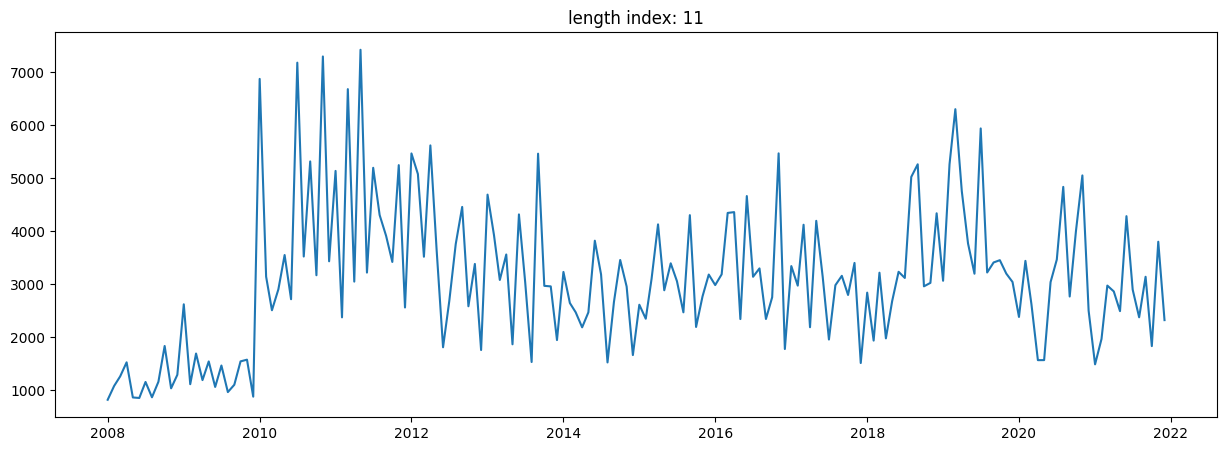

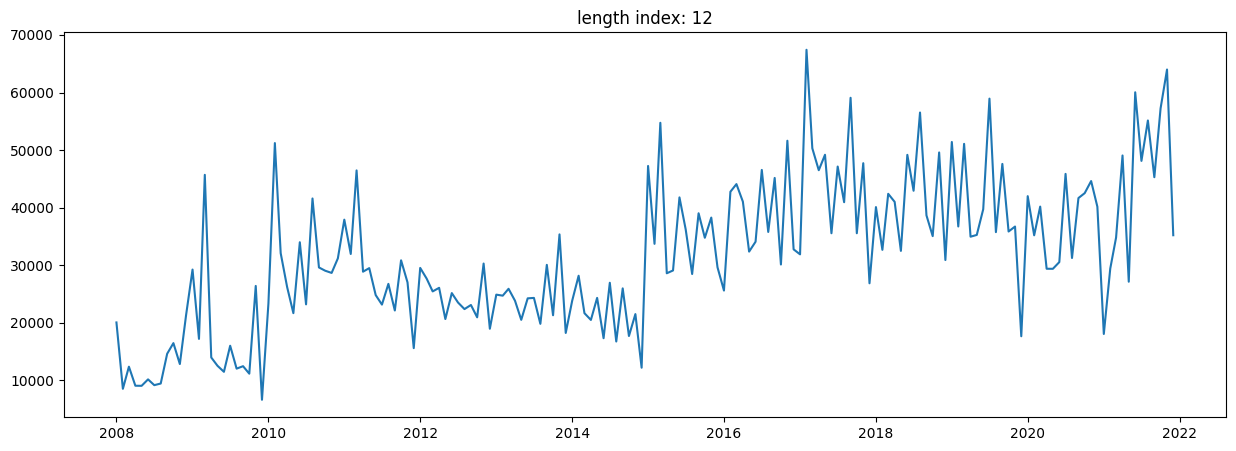

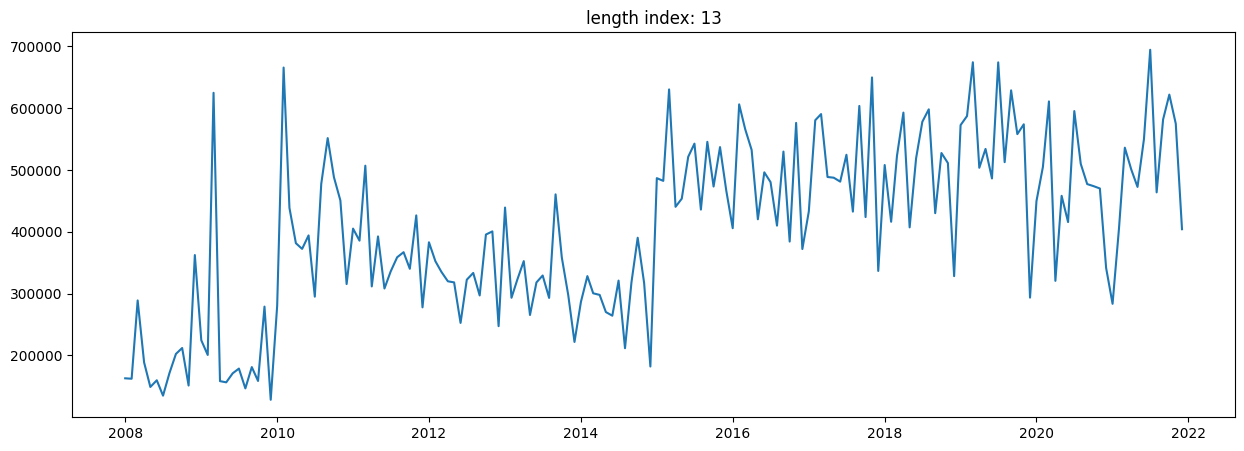

In [483]:
for i in range(9, 14):
    plot_month(df_sort[df_sort['len_idx'] == i], f"length index: {i}")

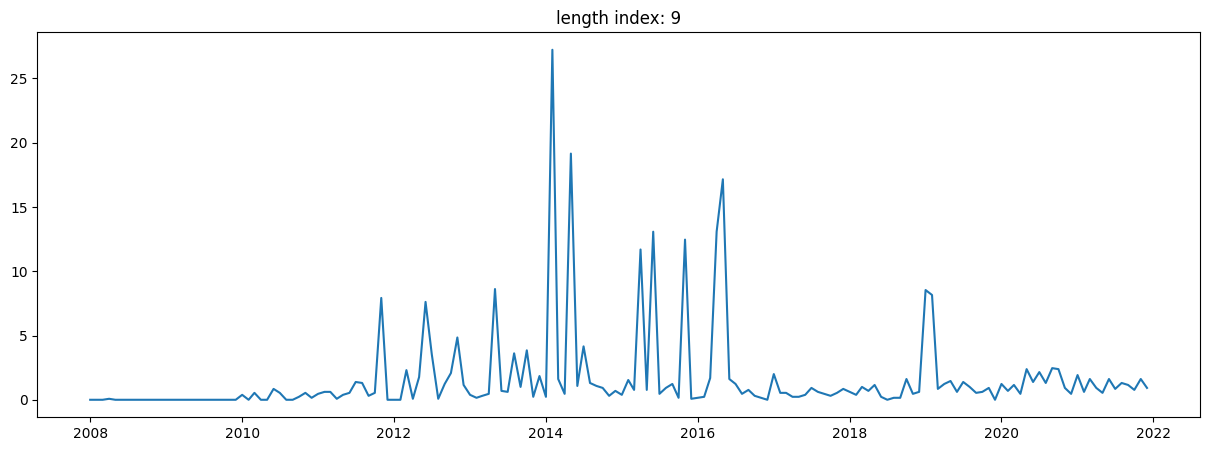

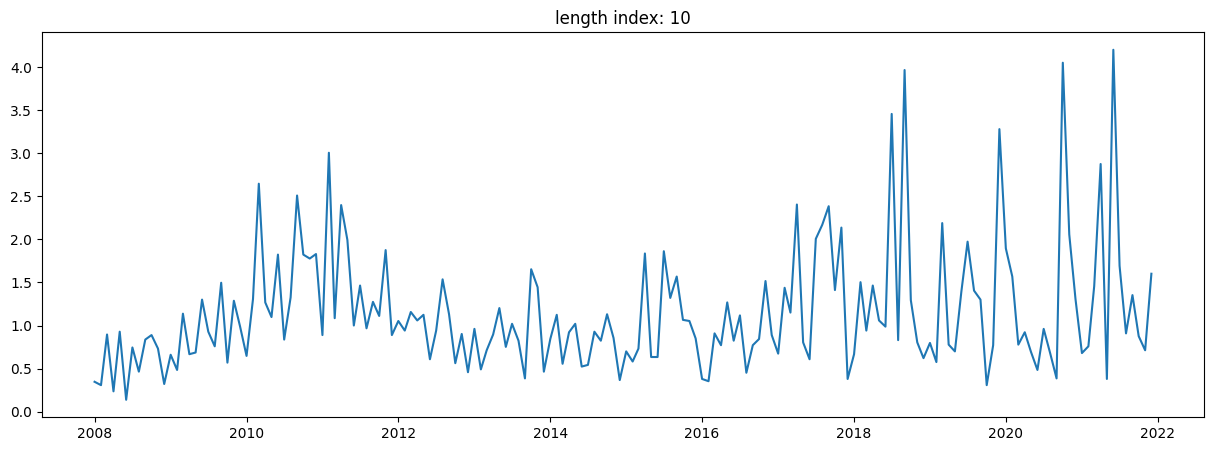

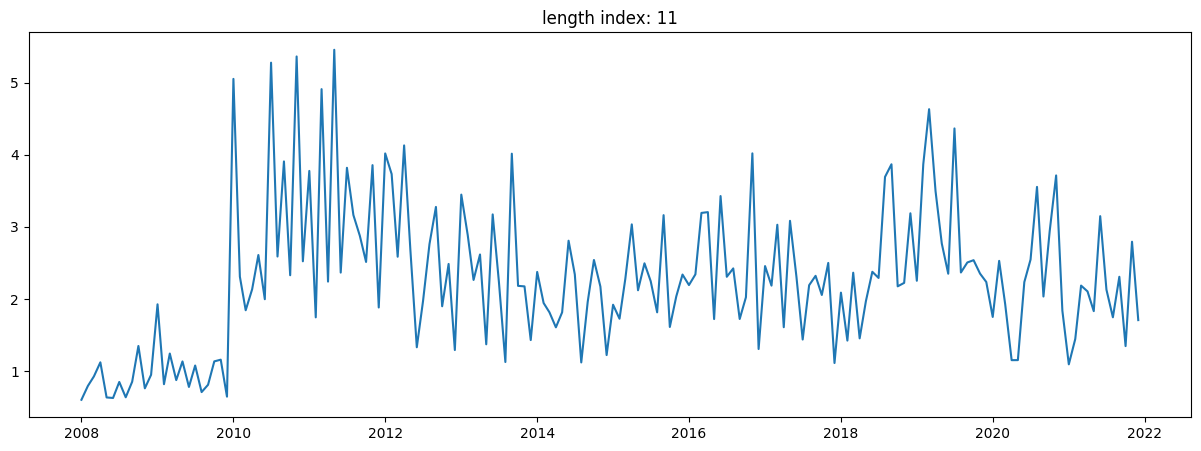

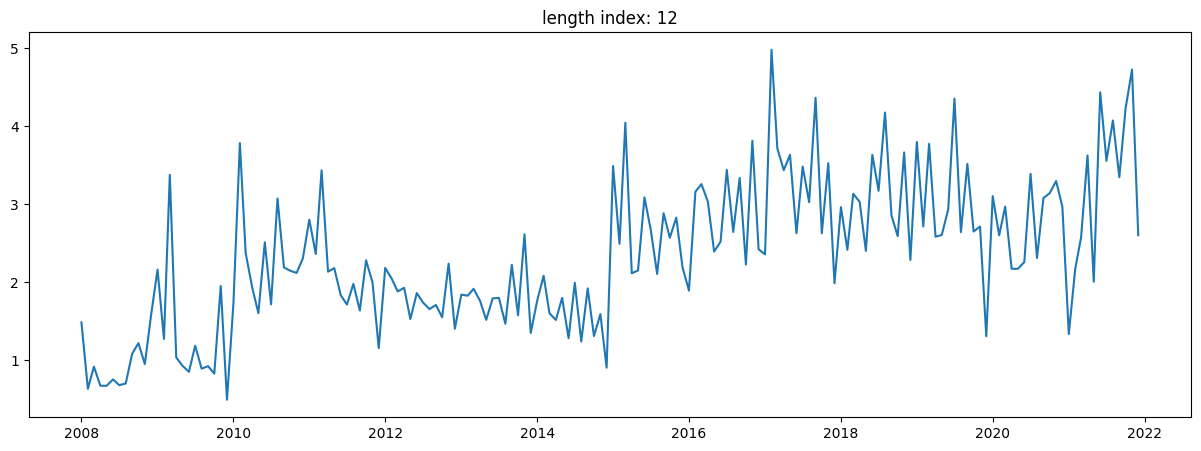

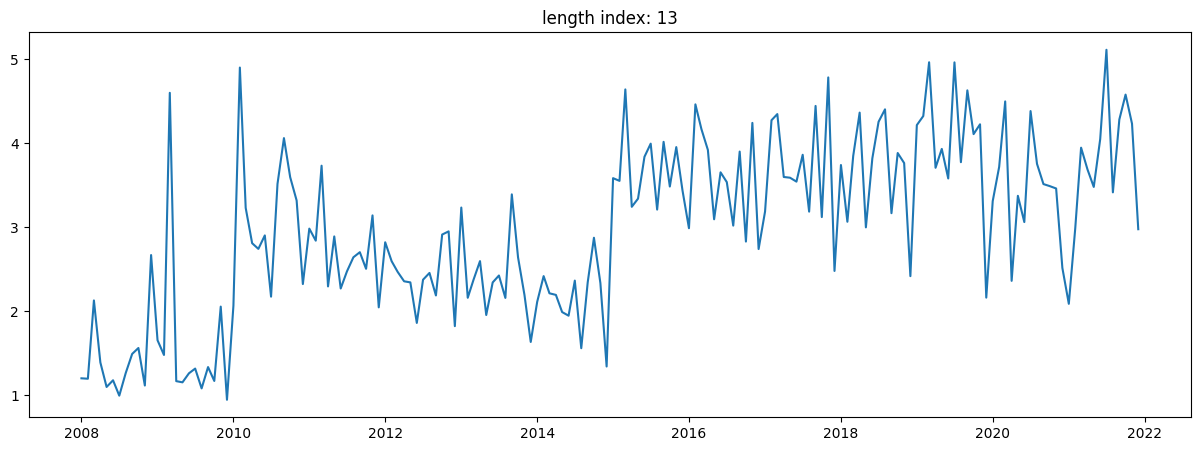

In [492]:
for i in range(9, 14):
    plot_month_mean(df_sort[df_sort['len_idx'] == i], f"length index: {i}")

## Data processing

### change negative value

In [60]:
df[df < 0] = 0

In [379]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
M200801,150810.0,1.220377,47.482262,0.0,0.0,0.0,0.0,11717.0
M200802,150810.0,1.141264,105.050201,0.0,0.0,0.0,0.0,40000.0
M200803,150810.0,2.007944,340.890353,0.0,0.0,0.0,0.0,130000.0
M200804,150810.0,1.322207,64.197082,0.0,0.0,0.0,0.0,20176.0
M200805,150810.0,1.055606,80.361102,0.0,0.0,0.0,0.0,30000.0
...,...,...,...,...,...,...,...,...
M202108,150810.0,3.457735,105.413597,0.0,0.0,0.0,0.0,20000.0
M202109,150810.0,4.179139,84.092593,0.0,0.0,0.0,0.0,10536.0
M202110,150810.0,4.516153,138.704015,0.0,0.0,0.0,0.0,40000.0
M202111,150810.0,4.261972,92.961310,0.0,0.0,0.0,0.0,16000.0


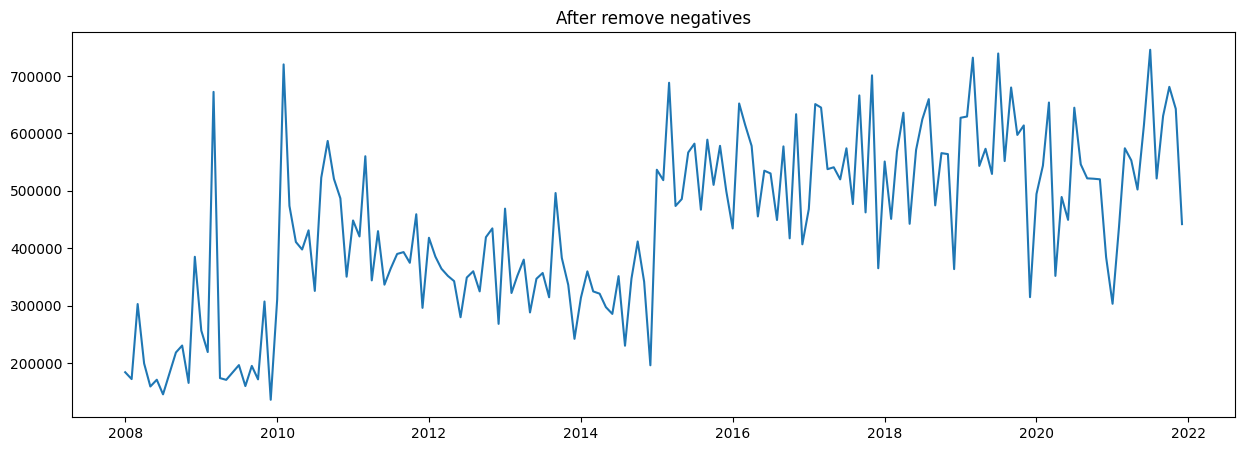

In [380]:
plot_month(df,'After remove negatives')

In [581]:
index = np.random.choice(range(len(df)))
index

100283

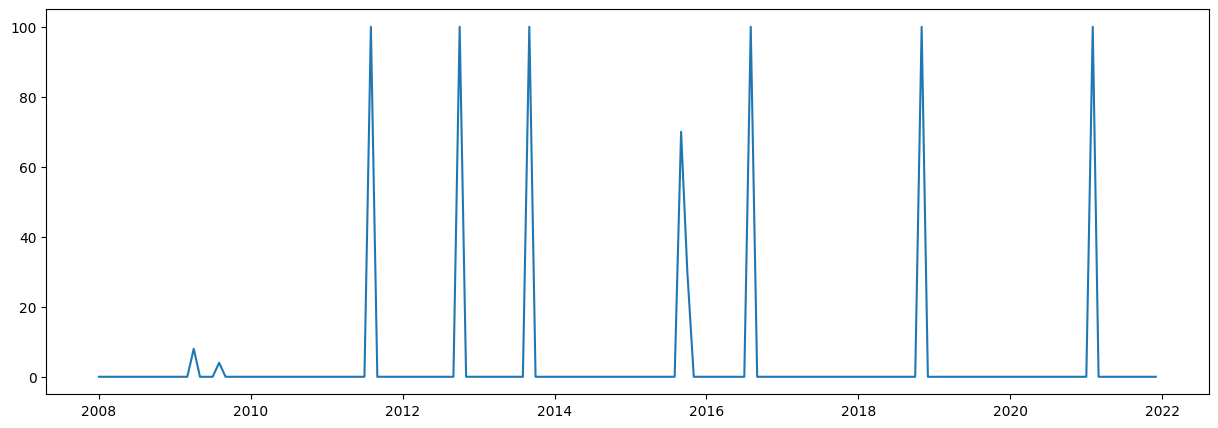

In [582]:
plot_month(df.iloc[[index]])

In [385]:
df[df['M202108'] > 10000]

,M200801,M200802,M200803,M200804,M200805,M200806,M200807,M200808,M200809,M200810,...,M202103,M202104,M202105,M202106,M202107,M202108,M202109,M202110,M202111,M202112
MatNr_n,,,,,,,,,,,,,,,,,,,,,
994439189419,0,2,106,16,283,0,5,0,0,0,...,0,0,0,2400,220,20000,0,0,35,0
1009770854891,10,4,122,6,14,6,1,74,6,8,...,1715,2235,5689,3281,3717,11142,4889,5635,1953,976
8043155656563,11717,60,4,26,19,6,3,139,6,16,...,3301,5653,1410,6140,1787,14144,1842,1419,5546,3802
9498770756642,0,0,0,0,0,20,0,0,0,0,...,0,0,0,0,0,20000,0,0,0,0


In [496]:
df_sort[df_sort['len_idx'] == 13].index

Int64Index([1000031385820, 1000121644949, 1000143014147, 1000201752663,
            1000221617774, 1000300184149, 1000381800605, 1000407239681,
            1000590021055, 1000592069965,
            ...
            9999339471240, 9999361967337, 9999504082509, 9999620749292,
            9999877915401, 9999878534731, 9999881715197, 9999945110327,
            9999945156893, 9999995732367],
           dtype='int64', name='MatNr_n', length=135755)

In [498]:
df_sort.to_csv('sort_df.csv')

## Split training and testing

In [676]:
cols_train = df.columns[:-12]
cols_test = df.columns[-12:]
df_train = df[cols_train].T
df_test = df[cols_test].T

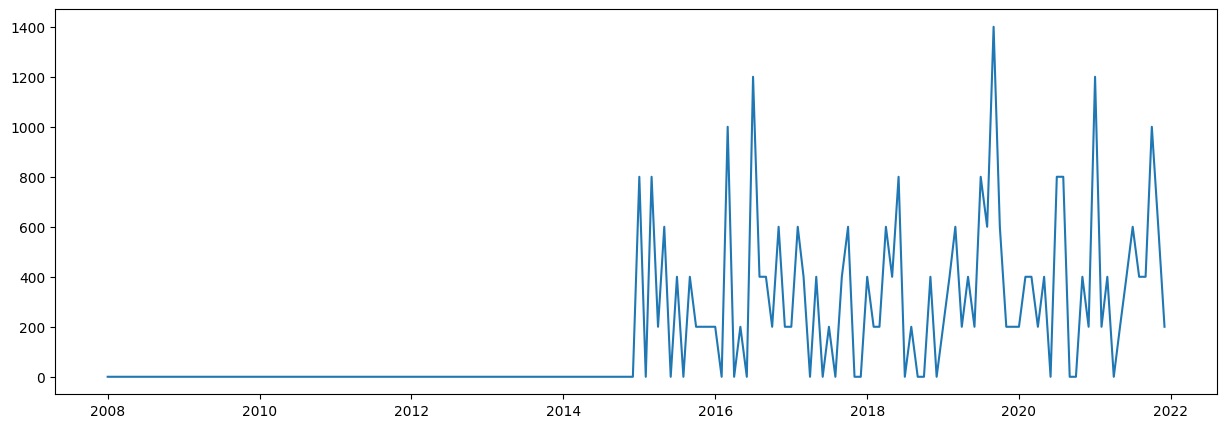

In [677]:
plot_month(df.loc[[5574758316533]])

## Build model base line

In [679]:
df_train.index = np.array([datetime.strptime(date,'M%Y%m').date() for date in df_train.index])

In [680]:
df_test.index = np.array([datetime.strptime(date,'M%Y%m').date() for date in df_test.index])

In [544]:
df_test

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2021-01-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,0,0,2,0,2,0
2021-02-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,3,0
2021-03-01,0,0,0,0,0,60,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
2021-04-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-05-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-06-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,0,0,0,0,0
2021-07-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,2,0
2021-08-01,0,0,0,0,0,60,0,0,0,0,...,0,0,0,0,0,0,2,0,27,0
2021-09-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
2021-10-01,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,4,0,9,0


In [583]:
df_train

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2008-01-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
2008-02-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,4,0
2008-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-04-01,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2008-05-01,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,1,0,2,0,0,0
2020-09-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,6,0
2020-10-01,0,0,0,0,0,0,0,4,10,0,...,0,0,0,0,0,0,8,0,6,0
2020-11-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0


In [639]:
X_train = df_train.copy()
X_train

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2008-01-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
2008-02-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,4,0
2008-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-04-01,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2008-05-01,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,1,0,2,0,0,0
2020-09-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,6,0
2020-10-01,0,0,0,0,0,0,0,4,10,0,...,0,0,0,0,0,0,8,0,6,0
2020-11-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0


In [638]:
df_train

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2008-01-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
2008-02-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,4,0
2008-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-04-01,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2008-05-01,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,1,0,2,0,0,0
2020-09-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,6,0
2020-10-01,0,0,0,0,0,0,0,4,10,0,...,0,0,0,0,0,0,8,0,6,0
2020-11-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0


In [644]:
## rolling 
X_train = X_train.rolling(window = 12, center = True, min_periods=0, axis=0).mean()

In [645]:
X_train

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2008-01-01,NaN,0.152778,0.152778,0.152778,0.142361,0.583333,0.877315,1.087302,1.244792,1.361111,...,0.104798,0.115278,0.118827,0.121528,0.125000,0.129630,0.136111,0.145833,0.162037,0.194444
2008-02-01,NaN,0.130952,0.130952,0.130952,0.133929,0.609524,0.926587,1.153061,1.322917,1.449735,...,0.094156,0.103571,0.107143,0.110119,0.113946,0.119048,0.126190,0.136905,0.150794,0.178571
2008-03-01,NaN,0.114583,0.114583,0.114583,0.117188,0.579167,0.887153,1.107143,1.272135,1.395833,...,0.082386,0.090625,0.093750,0.096354,0.099702,0.104167,0.110417,0.119792,0.131944,0.156250
2008-04-01,NaN,0.101852,0.101852,0.101852,0.104167,0.559259,0.862654,1.079365,1.241898,1.364198,...,0.190236,0.207407,0.212963,0.219907,0.228836,0.240741,0.257407,0.282407,0.308642,0.361111
2008-05-01,NaN,0.091667,0.091667,0.091667,0.093750,0.588333,0.918056,1.153571,1.330208,1.463889,...,0.172727,0.187500,0.191667,0.197917,0.205952,0.216667,0.231667,0.254167,0.277778,0.325000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,NaN,1.492424,1.492424,1.492424,1.477273,1.590909,1.666667,1.673160,1.668561,1.661616,...,0.429063,0.407576,0.381313,0.375000,0.391775,0.415404,0.446970,0.498106,0.527778,0.590909
2020-09-01,NaN,1.633333,1.633333,1.633333,1.618750,1.718333,1.784722,1.779762,1.765625,1.750926,...,0.413636,0.386667,0.353704,0.339583,0.348810,0.362500,0.381667,0.414583,0.447222,0.516667
2020-10-01,NaN,1.518519,1.518519,1.518519,1.506944,1.605556,1.671296,1.699735,1.709491,1.712963,...,0.393939,0.364815,0.329218,0.312500,0.321429,0.334877,0.353704,0.386574,0.422840,0.500000
2020-11-01,NaN,1.708333,1.708333,1.708333,1.695312,1.795833,1.862847,1.889881,1.897135,1.898148,...,0.399621,0.369792,0.333333,0.315104,0.325893,0.342014,0.364583,0.403646,0.444444,0.531250


In [660]:

col

5907369142293

In [813]:
plot_month(df_train.loc[:,5907369142293])

AttributeError: 'Series' object has no attribute 'columns'

In [665]:
sr_mean = df_train.mean(axis=0)

In [774]:
high = sr_mean[(sr_mean < 1000) & (sr_mean > 100)]

MatNr_n,103379653791,104080986274,105025501059,106130007753,106939853290,160992885671,161107452321,161539455622,163181801118,164088406416,...,7650189836410,7651139105597,7651257034321,7651857006310,7651896466448,7653154999930,7653761044143,7654080459855,7655055223997,7656278055228
2008-01-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
2008-02-01,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,4,0
2008-03-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2008-04-01,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
2008-05-01,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0,0,0,0,0,30,0,0,0,0,...,0,0,0,0,1,0,2,0,0,0
2020-09-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,6,0
2020-10-01,0,0,0,0,0,0,0,4,10,0,...,0,0,0,0,0,0,8,0,6,0
2020-11-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,0,0


In [801]:
print("numbers of mean in [1000 -> ]:",sr_mean[sr_mean > 1000].shape[0])
print("numbers of mean in [1000 -> 100]:",sr_mean[(sr_mean < 1000) & (sr_mean > 100)].shape[0])
print("numbers of mean in [10 -> 100]:",sr_mean[(sr_mean < 100) & (sr_mean > 10)].shape[0])
print("numbers of mean in [1 -> 10]:",sr_mean[(sr_mean < 10) & (sr_mean > 1)].shape[0])
print("numbers of mean in [0 -> 1]:",sr_mean[(sr_mean < 1)].shape[0])

numbers of mean in [1000 -> ]: 45
numbers of mean in [1000 -> 100]: 543
numbers of mean in [10 -> 100]: 4684
numbers of mean in [1 -> 10]: 19585
numbers of mean in [0 -> 1]: 125879


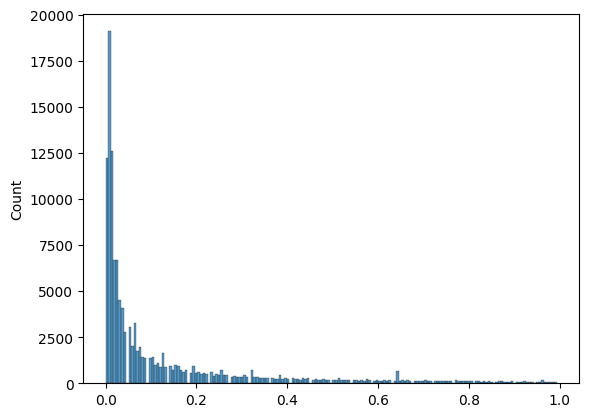

In [804]:
sns.histplot(sr_mean[(sr_mean < 1)]);

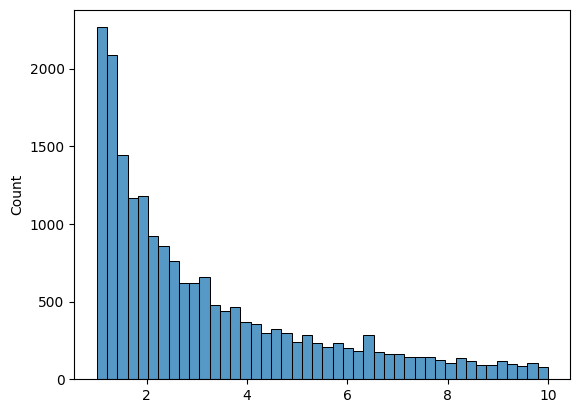

In [806]:
sns.histplot(sr_mean[(sr_mean < 10) & (sr_mean > 1)]);

In [816]:
st = sr_mean[sr_mean > 1000].shape[0]
col =  np.random.choice(st)

In [819]:
col

22

In [818]:
df_train[col]

KeyError: 22